# **1. Perkenalan Dataset**


Sumber dataset (Kaggle): https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/

Penyakit jantung masih menjadi musuh sunyi yang merayap di balik kesibukan masyarakat modern. Di banyak negara, termasuk Indonesia, penyakit ini berada pada jajaran teratas penyebab kematian. Tantangan utamanya bukan hanya pada pengobatan, tetapi pada kemampuan mendeteksi risiko lebih awal, sebelum gejala kritis muncul. Di tengah laju kehidupan yang serba cepat, pendekatan prediktif berbasis data memberi peluang baru untuk mengenali tanda-tanda bahaya sejak dini.

Dataset Heart Failure Prediction yang digunakan dalam penelitian ini berisi 918 data pasien dengan beragam parameter klinis yang berpotensi berkaitan dengan penyakit jantung. Fitur-fiturnya menggambarkan potret kecil dari kondisi kesehatan seseorang, mulai dari usia, jenis kelamin, tekanan darah, tingkat kolesterol, hasil elektrokardiogram, hingga kemampuan fisik saat melakukan aktivitas. Dalam dataset ini juga terdapat variabel target bernama HeartDisease, yaitu indikator apakah pasien terdiagnosis memiliki penyakit jantung (1) atau tidak (0).

**Atribut Dataset**
*   Age: usia pasien dalam tahun.
*   Sex: jenis kelamin pasien [M: Male, F: Female].
*   ChestPainType: jenis nyeri dada [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic].
*   RestingBP: tekanan darah saat istirahat [mm Hg].
*   Cholesterol: kadar kolesterol serum [mg/dl].
*   FastingBS: gula darah puasa [1 jika >120 mg/dl, 0 jika ≤120 mg/dl].
*   RestingECG: hasil elektrokardiogram saat istirahat [Normal, ST: terdapat abnormalitas ST-T, LVH: indikasi hipertrofi ventrikel kiri].
*   MaxHR: denyut jantung maksimum yang dicapai (rentang nilai 60–202).
*   ExerciseAngina: angina akibat aktivitas fisik [Y: Yes, N: No].
*   Oldpeak: nilai depresi ST dibanding kondisi istirahat.
*   ST_Slope: bentuk kemiringan segmen ST saat latihan [Up, Flat, Down].
*   HeartDisease: variabel target [1: terindikasi penyakit jantung, 0: normal].


# **2. Import Library**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

# **3. Memuat Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
data = pd.read_csv('/content/drive/MyDrive/dataset/Heart Failure Prediction Dataset.csv')

# **4. Exploratory Data Analysis (EDA)**



In [31]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [34]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


,count
HeartDisease,
1,508
0,410


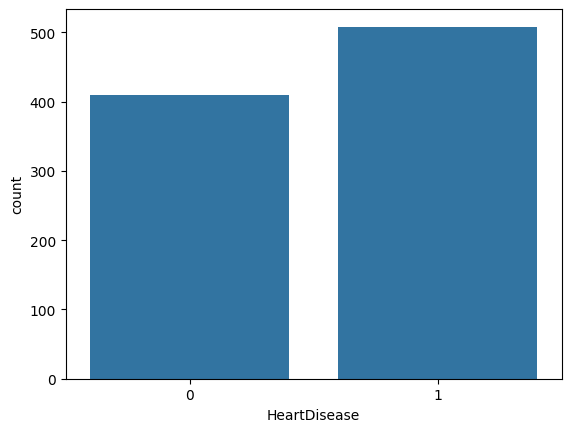

In [35]:
sns.countplot(x = "HeartDisease", data = data)
data.loc[:, 'HeartDisease'].value_counts()

In [36]:
categorical_feature = data.dtypes==object
final_categorical_feature = data.columns[categorical_feature].tolist()
# ---------------------------------------------------------
final_numeric_feature = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

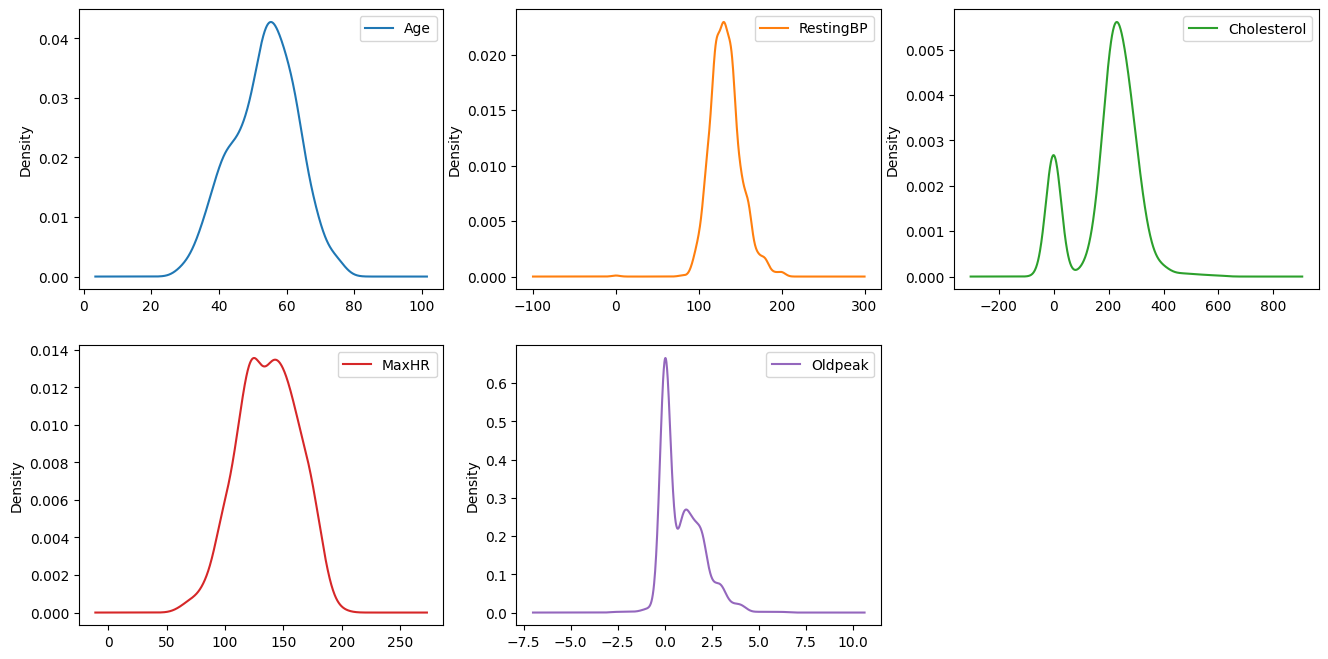

In [37]:
data[final_numeric_feature].plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize= (16,8))
plt.show()

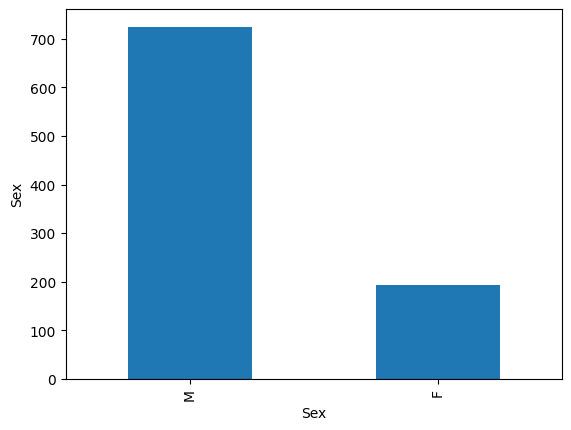

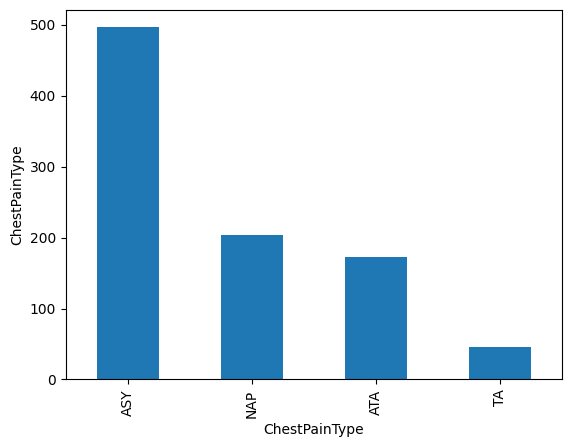

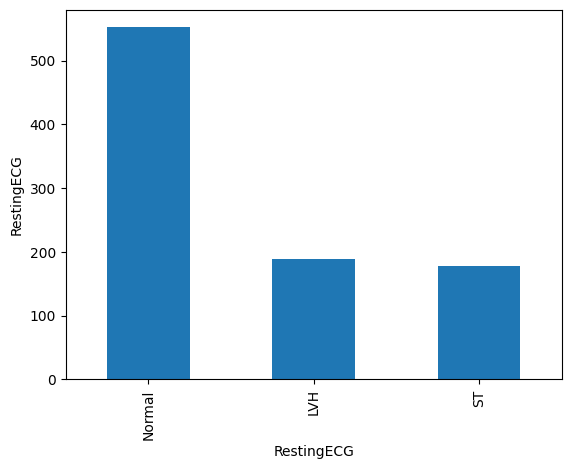

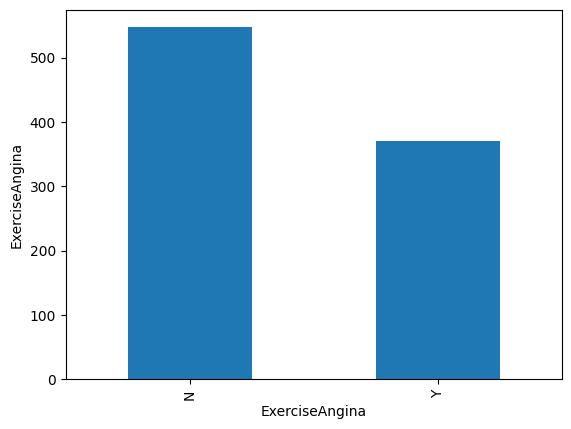

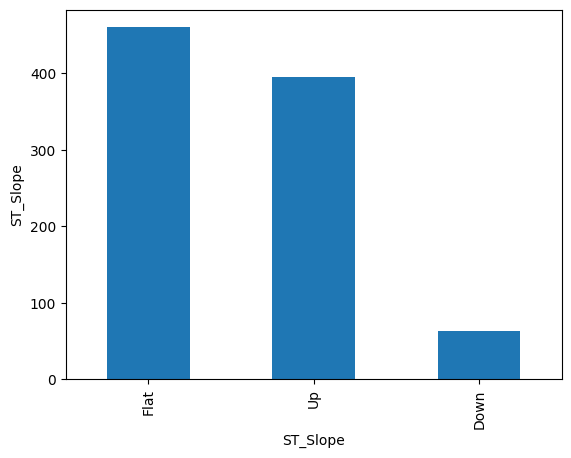

In [38]:
for i in range(len(final_categorical_feature)):
    data[final_categorical_feature[i]].value_counts().plot(kind='bar')
    plt.xticks(rotation='vertical')
    plt.ylabel(final_categorical_feature[i])
    plt.show()

# **5. Data Preprocessing**

**5.1 Mengatasi Outlier**

In [39]:
df = data.copy()

In [40]:
labels=["Healthy","Heart Disease"]

healthy_or_not = df['HeartDisease'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

fig = px.pie(values=df['HeartDisease'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Healthy vs Heart Disease")
fig.show()

In [41]:
numerical_columns = list(df.loc[:,['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
categorical_columns = list(df.loc[:,['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

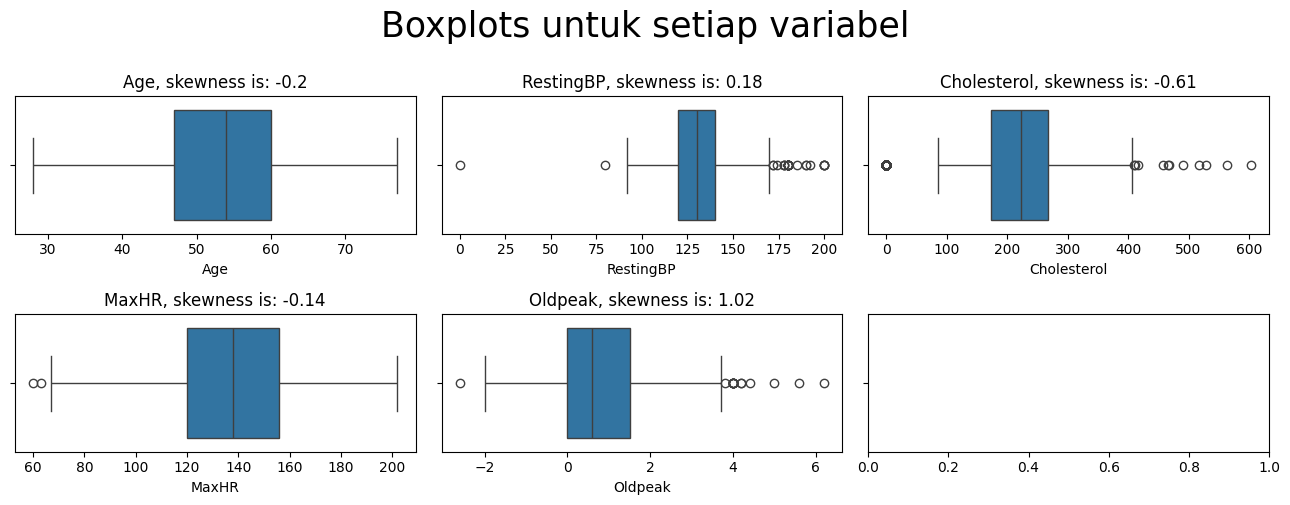

In [42]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots untuk setiap variabel')
plt.tight_layout()

In [43]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]

    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])

    return multiple_outliers

In [44]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,numerical_columns)

# dropping outliers
df = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 16


In [45]:
df = pd.get_dummies(df, drop_first=True)

In [46]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [48]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features

    return df

In [49]:
col_names = numerical_columns
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)